In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import mplfinance as mpf
import datetime as dt

In [22]:
tickersT = ['PRILX', 'PRBLX', 'BAWAX', 'BAFWX', 'BIAWX', 'ETAGX', 'ETCGX', 'ETILX', 'ETGLX', 'PFPWX']
tickersB = ['PXE', 'OIH', 'FTXN', 'FCG', 'PXJ', 'IEO', 'JHME', 'FSENX', 'XLE', 'VDE']
Median = ['JSAAX']
SPY = ['SPY']

In [78]:
yticker = yf.download(SPY, period="5y", interval = "1mo",threads=False,progress=False)['Adj Close']

SP = pd.DataFrame(yticker)
SP = SP.dropna()
SP

Adj Close
Date                  
2017-05-01  221.248306
2017-06-01  221.578232
2017-07-01  227.235382
2017-08-01  227.898361
2017-09-01  231.342300
...                ...
2022-01-01  448.516632
2022-02-01  435.277771
2022-03-01  450.241272
2022-04-01  445.040009
2022-04-19  445.040009

[61 rows x 1 columns]

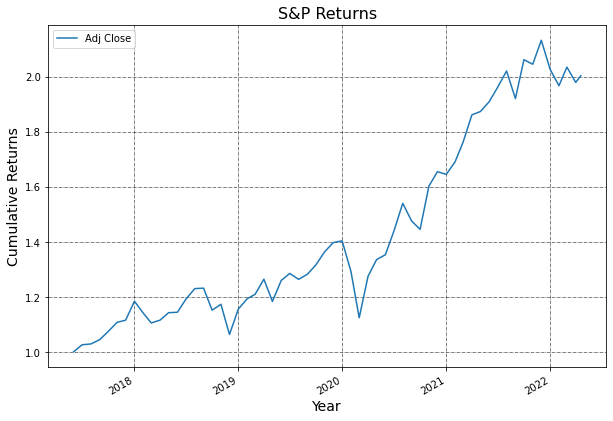

In [77]:
SP_monthly_ret = ((SP.pct_change()+1).cumprod())
SP_monthly_ret.plot(figsize=(10, 7))
plt.title("S&P Returns", fontsize=16)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.savefig('S&P_returns.png')
plt.show()

In [62]:
print(SP_monthly_ret.mean())

Adj Close    1.438775
dtype: float64


In [47]:
yticker = yf.download(tickersT, period="5y", interval = "1mo",threads=False,progress=False)['Adj Close']

Top10 = pd.DataFrame()

for tick in tickersT:
    try:
        print('Downloading:' + tick)
        Top10[tickersT] = yticker
    except ValueError:
        print(' No data found')
        
Top10 = Top10.dropna()
Top10.head()

Downloading:PRILX
Downloading:PRBLX
Downloading:BAWAX
Downloading:BAFWX
Downloading:BIAWX
Downloading:ETAGX
Downloading:ETCGX
Downloading:ETILX
Downloading:ETGLX
Downloading:PFPWX


PRILX      PRBLX      BAWAX      BAFWX      BIAWX      ETAGX  \
Date                                                                           
2017-05-01  17.557461  17.155218  17.402367  24.194000  22.438242  24.289494   
2017-06-01  17.520460  17.109077  17.356159  25.544283  23.675926  25.649361   
2017-07-01  17.797974  17.376696  17.633415  25.621199  23.726444  25.726336   
2017-08-01  18.103241  17.662769  17.929152  26.014320  24.080069  26.119757   
2017-09-01  18.334505  17.884249  18.150955  27.193682  25.149357  27.300020   

                ETCGX      ETILX      ETGLX      PFPWX  
Date                                                    
2017-05-01  24.733898  24.695007  28.630241  28.407335  
2017-06-01  26.115633  25.443975  28.774874  28.543734  
2017-07-01  26.201454  25.723972  29.258785  29.039602  
2017-08-01  26.613398  25.716970  29.279501  29.066961  
2017-09-01  27.814905  26.353939  29.721350  29.497942

In [79]:
Top10_monthly_ret = ((Top10.pct_change()+1).cumprod())
Top10_monthly_ret.plot(figsize=(10, 7))
plt.legend()
plt.title("Sustainable Fund Returns", fontsize=16)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.savefig('SUS_returns.png')
plt.show()

In [53]:
print(Top10_monthly_ret.mean())

PRILX    1.712268
PRBLX    1.692202
BAWAX    1.704073
BAFWX    1.758260
BIAWX    1.719543
ETAGX    1.760613
ETCGX    1.770833
ETILX    1.398666
ETGLX    1.456959
PFPWX    1.465745
dtype: float64


In [58]:
print(Top10_monthly_ret.std())

PRILX    0.560354
PRBLX    0.544483
BAWAX    0.554173
BAFWX    0.557272
BIAWX    0.527652
ETAGX    0.559014
ETCGX    0.566966
ETILX    0.401678
ETGLX    0.371288
PFPWX    0.378109
dtype: float64


In [56]:
Top10_monthly_ret.corr()

PRILX     PRBLX     BAWAX     BAFWX     BIAWX     ETAGX     ETCGX  \
PRILX  1.000000  0.999992  0.999999  0.976872  0.974176  0.976964  0.977590   
PRBLX  0.999992  1.000000  0.999997  0.977420  0.974773  0.977510  0.978124   
BAWAX  0.999999  0.999997  1.000000  0.977076  0.974399  0.977168  0.977790   
BAFWX  0.976872  0.977420  0.977076  1.000000  0.999903  1.000000  0.999992   
BIAWX  0.974176  0.974773  0.974399  0.999903  1.000000  0.999895  0.999840   
ETAGX  0.976964  0.977510  0.977168  1.000000  0.999895  1.000000  0.999994   
ETCGX  0.977590  0.978124  0.977790  0.999992  0.999840  0.999994  1.000000   
ETILX  0.936125  0.935913  0.936058  0.927293  0.924826  0.927344  0.927920   
ETGLX  0.985040  0.984720  0.984927  0.956912  0.953452  0.957029  0.957848   
PFPWX  0.985223  0.984896  0.985107  0.956883  0.953405  0.957000  0.957824   

          ETILX     ETGLX     PFPWX  
PRILX  0.936125  0.985040  0.985223  
PRBLX  0.935913  0.984720  0.984896  
BAWAX  0.936058  0.984927  0.985107  
BAFWX  0.927293  0.956912  0.956883  
BIAWX  0.924826  0.953452  0.953405  
ETAGX  0.927344  0.957029  0.957000  
ETCGX  0.927920  0.957848  0.957824  
ETILX  1.000000  0.969834  0.969453  
ETGLX  0.969834  1.000000  0.999995  
PFPWX  0.969453  0.999995  1.000000

In [60]:
Top10_monthly_ret.cov()

PRILX     PRBLX     BAWAX     BAFWX     BIAWX     ETAGX     ETCGX  \
PRILX  0.313996  0.305100  0.310532  0.305047  0.288036  0.306030  0.310582   
PRBLX  0.305100  0.296461  0.301736  0.296574  0.280050  0.297528  0.301950   
BAWAX  0.310532  0.301736  0.307107  0.301746  0.284924  0.302717  0.307219   
BAFWX  0.305047  0.296574  0.301746  0.310552  0.294017  0.311523  0.315952   
BIAWX  0.288036  0.280050  0.284924  0.294017  0.278417  0.294934  0.299113   
ETAGX  0.306030  0.297528  0.302717  0.311523  0.294934  0.312497  0.316940   
ETCGX  0.310582  0.301950  0.307219  0.315952  0.299113  0.316940  0.321451   
ETILX  0.210705  0.204691  0.208366  0.207569  0.196014  0.208229  0.211323   
ETGLX  0.204940  0.199071  0.202656  0.197993  0.186792  0.198636  0.201635   
PFPWX  0.208744  0.202764  0.206417  0.201624  0.190214  0.202279  0.205333   

          ETILX     ETGLX     PFPWX  
PRILX  0.210705  0.204940  0.208744  
PRBLX  0.204691  0.199071  0.202764  
BAWAX  0.208366  0.202656  0.206417  
BAFWX  0.207569  0.197993  0.201624  
BIAWX  0.196014  0.186792  0.190214  
ETAGX  0.208229  0.198636  0.202279  
ETCGX  0.211323  0.201635  0.205333  
ETILX  0.161345  0.144639  0.147239  
ETGLX  0.144639  0.137855  0.140387  
PFPWX  0.147239  0.140387  0.142966

In [68]:
yticker = yf.download(tickersB, period="5y", interval = "1mo",threads=False,progress=False)['Adj Close']

Bottom10 = pd.DataFrame()

for tick in tickersB:
    print('Downloading: '+tick)
    try:
        Bottom10[tickersB] = yticker
    except ValueError:
        print(' No data found')
        
Bottom10 = Bottom10.dropna()
Bottom10.head()

Downloading: PXE
Downloading: OIH
Downloading: FTXN
Downloading: FCG
Downloading: PXJ
Downloading: IEO
Downloading: JHME
Downloading: FSENX
Downloading: XLE
Downloading: VDE


PXE        OIH       FTXN        FCG        PXJ         IEO  \
Date                                                                            
2017-05-01  18.760290  35.557438  16.884373  49.040001  22.242783  472.878113   
2017-06-01  18.063173  34.702911  16.275377  48.719353  21.954622  451.913940   
2017-07-01  18.835264  35.872265  16.678303  50.323898  22.870853  452.643188   
2017-08-01  17.330585  33.506569  15.682177  46.678280  21.256390  404.699097   
2017-09-01  19.480122  37.149563  17.254044  52.495186  23.739584  475.247986   

                 JHME     FSENX        XLE        VDE  
Date                                                   
2017-05-01  17.334036  8.755679  74.242592  51.404457  
2017-06-01  17.073984  8.441051  73.372078  50.995983  
2017-07-01  17.525587  8.426541  75.770950  52.691635  
2017-08-01  16.646589  7.570366  71.547546  49.804741  
2017-09-01  18.739870  8.931229  78.108025  54.162769

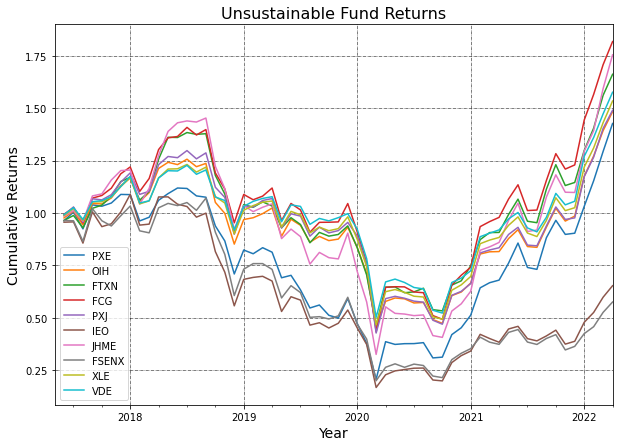

In [80]:
Bottom10_monthly_ret = ((Bottom10.pct_change()+1).cumprod())
Bottom10_monthly_ret.plot(figsize=(10, 7))
plt.legend()
plt.title("Unsustainable Fund Returns", fontsize=16)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.savefig('UNSUS_returns.png')
plt.show()

In [71]:
print(Bottom10_monthly_ret.mean())

PXE      0.775567
OIH      0.930581
FTXN     0.996786
FCG      1.041762
PXJ      0.952514
IEO      0.595344
JHME     0.965906
FSENX    0.604796
XLE      0.958900
VDE      0.982154
dtype: float64


In [72]:
print(Bottom10_monthly_ret.std())

PXE      0.284010
OIH      0.232857
FTXN     0.259303
FCG      0.284874
PXJ      0.240439
IEO      0.279812
JHME     0.316088
FSENX    0.279324
XLE      0.224873
VDE      0.217612
dtype: float64


In [73]:
Bottom10_monthly_ret.corr()

PXE       OIH      FTXN       FCG       PXJ       IEO      JHME  \
PXE    1.000000  0.950287  0.941653  0.926452  0.935031  0.779346  0.966179   
OIH    0.950287  1.000000  0.974278  0.969873  0.996286  0.771843  0.979559   
FTXN   0.941653  0.974278  1.000000  0.992207  0.965455  0.661796  0.992694   
FCG    0.926452  0.969873  0.992207  1.000000  0.959166  0.610448  0.979805   
PXJ    0.935031  0.996286  0.965455  0.959166  1.000000  0.785308  0.972247   
IEO    0.779346  0.771843  0.661796  0.610448  0.785308  1.000000  0.722544   
JHME   0.966179  0.979559  0.992694  0.979805  0.972247  0.722544  1.000000   
FSENX  0.718438  0.722924  0.606561  0.550698  0.745751  0.990089  0.671659   
XLE    0.939045  0.993239  0.975245  0.980344  0.990973  0.715858  0.975728   
VDE    0.920240  0.984324  0.969585  0.981957  0.981043  0.669089  0.963767   

          FSENX       XLE       VDE  
PXE    0.718438  0.939045  0.920240  
OIH    0.722924  0.993239  0.984324  
FTXN   0.606561  0.975245  0.969585  
FCG    0.550698  0.980344  0.981957  
PXJ    0.745751  0.990973  0.981043  
IEO    0.990089  0.715858  0.669089  
JHME   0.671659  0.975728  0.963767  
FSENX  1.000000  0.667974  0.618624  
XLE    0.667974  1.000000  0.997048  
VDE    0.618624  0.997048  1.000000

In [74]:
Bottom10_monthly_ret.cov()

PXE       OIH      FTXN       FCG       PXJ       IEO      JHME  \
PXE    0.080662  0.062846  0.069348  0.074956  0.063851  0.061934  0.086736   
OIH    0.062846  0.054222  0.058827  0.064336  0.055780  0.050290  0.072099   
FTXN   0.069348  0.058827  0.067238  0.073293  0.060193  0.048017  0.081364   
FCG    0.074956  0.064336  0.073293  0.081153  0.065698  0.048659  0.088227   
PXJ    0.063851  0.055780  0.060193  0.065698  0.057811  0.052834  0.073891   
IEO    0.061934  0.050290  0.048017  0.048659  0.052834  0.078294  0.063905   
JHME   0.086736  0.072099  0.081364  0.088227  0.073891  0.063905  0.099912   
FSENX  0.056994  0.047021  0.043933  0.043820  0.050085  0.077383  0.059301   
XLE    0.059973  0.052009  0.056867  0.062801  0.053580  0.045043  0.069354   
VDE    0.056875  0.049878  0.054711  0.060873  0.051331  0.040741  0.066292   

          FSENX       XLE       VDE  
PXE    0.056994  0.059973  0.056875  
OIH    0.047021  0.052009  0.049878  
FTXN   0.043933  0.056867  0.054711  
FCG    0.043820  0.062801  0.060873  
PXJ    0.050085  0.053580  0.051331  
IEO    0.077383  0.045043  0.040741  
JHME   0.059301  0.069354  0.066292  
FSENX  0.078022  0.041957  0.037603  
XLE    0.041957  0.050568  0.048791  
VDE    0.037603  0.048791  0.047355

In [63]:
yticker = yf.download(Median, period="5y", interval = "1mo",threads=False,progress=False)['Adj Close']

Med = pd.DataFrame(yticker)
Med = Med.dropna()
Med.head()

Adj Close
Date                 
2017-05-01  13.595780
2017-06-01  13.677520
2017-07-01  14.058822
2017-08-01  14.106572
2017-09-01  14.352143

In [81]:
Med_monthly_ret =((Med.pct_change()+1).cumprod())
Med_monthly_ret.plot(figsize=(10, 7))
plt.title("JSAAX Returns", fontsize=16)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.savefig('Median_returns.png')
plt.show()

In [67]:
print(Med_monthly_ret.mean())

Adj Close    1.249376
dtype: float64
